In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

In [47]:
pd.set_option('display.max_columns', 50)
df = pd.read_csv('preprocessed.csv')
df.head()

,Unnamed: 0,age,time_in_hospital,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,...,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,change_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,0,5,1,1,41,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,1,15,3,9,59,0,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
2,2,25,2,6,11,5,13,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
3,3,35,2,7,44,1,16,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
4,4,45,1,5,51,0,8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1


Since preprocessed file included all original columns plus the one-hot features, we can only select the columns that we need for training our model:

In [48]:
df = df.drop(df.columns[0],axis=1)
print(df.shape)
df.head()

(99340, 140)


,age,time_in_hospital,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,...,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,change_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,5,1,1,41,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,15,3,9,59,0,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
2,25,2,6,11,5,13,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
3,35,2,7,44,1,16,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
4,45,1,5,51,0,8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1


In [49]:
# input features
# X = df.iloc[:,:-3]
# # labels
# y = df.iloc[:,-3:]

df_train, df_valtest = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_valtest, test_size=0.5, random_state=42)
print(df_train.shape,df_test.shape,df_val.shape)
print(df_train.shape,df_test.shape,df_val.shape)

(79472, 140) (9934, 140) (9934, 140)
(79472, 140) (9934, 140) (9934, 140)


In [50]:
def calculate_prevalence(y, string):
    print ("*** prevalence for %s ***" % string)
    for column in y.columns:
        print ("---- %s --- " % column)
        print(sum(y[column])/len(y[column]))
calculate_prevalence(df.iloc[:,-3:-2],'all')
calculate_prevalence(df_train.iloc[:,-3:-2],'trainig set')
calculate_prevalence(df_val.iloc[:,-3:-2], 'valdiation set')
calculate_prevalence(df_test.iloc[:,-3:-2], 'test set')

*** prevalence for all ***
---- readmitted_<30 --- 
0.1138916851218039
*** prevalence for trainig set ***
---- readmitted_<30 --- 
0.11421632776323737
*** prevalence for valdiation set ***
---- readmitted_<30 --- 
0.11032816589490638
*** prevalence for test set ***
---- readmitted_<30 --- 
0.11485806321723374


## Undersampling or Oversampling?

In [51]:
df_train.head()

,age,time_in_hospital,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,...,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,change_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
17017,65,6,4,52,6,33,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
13879,65,7,9,38,3,25,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
12255,15,3,2,14,0,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
60283,75,4,9,43,1,20,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
18835,45,8,9,42,1,13,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0


In [62]:
#Undersampling
class_lt30 = df_train[df_train['readmitted_<30'] == 1]
class_notlt30 = df_train[df_train['readmitted_<30'] == 0]
class_gt30 = df_train[df_train['readmitted_>30'] == 1]
class_no = df_train[df_train['readmitted_NO'] == 1]
balanced_df_train = pd.concat([class_lt30, class_notlt30.sample(n=len(class_lt30),random_state=42)],axis=0)
balanced_df_train = df_train.copy()
balanced_df_train = balanced_df_train.sample(frac=1,random_state=42).reset_index(drop=True)
balanced_df_train.head()

,age,time_in_hospital,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,...,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,change_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,85,3,5,28,2,16,3,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
1,85,7,9,56,0,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,85,5,9,45,0,12,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,85,5,9,32,1,17,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1
4,75,3,4,45,6,14,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1


In [53]:
# calculate_prevalence(balanced_df_train.iloc[:,-3:-2],'trainig set')

Let's seperate the dataframe into labels(y) and features (X): 

In [63]:
all_X_train = df_train.iloc[:,:-3]
X_train = balanced_df_train.iloc[:,:-3].values
X_val = df_val.iloc[:,:-3].values
X_test = df_test.iloc[:,:-3].values

y_train = balanced_df_train.iloc[:,-3].values
y_val = df_val.iloc[:,-3].values
y_test = df_test.iloc[:,-3].values

print(X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape)

(79472, 137) (79472,) (9934, 137) (9934,) (9934, 137) (9934,)


In [64]:
# !pip install imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y)
print(counter)

Counter({0: 70395, 1: 70395})


To make sure that different size in the variables is not going to make a problem in any of the models, we should normalize them. One way to do that is to use the standard scaler which removes the mean and scales down to unit variance.

In [65]:
scaler  = StandardScaler()
scaler.fit(all_X_train)
X_train_tf = scaler.transform(X_train)
X_val_tf = scaler.transform(X_val)
X_test_tf = scaler.transform(X_test)

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 6,random_state=42)
model.fit(X_train_tf, y_train)
y_pred = model.predict(X_test_tf)

In [67]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      8793
           1       0.12      0.14      0.13      1141

    accuracy                           0.79      9934
   macro avg       0.51      0.51      0.51      9934
weighted avg       0.80      0.79      0.79      9934



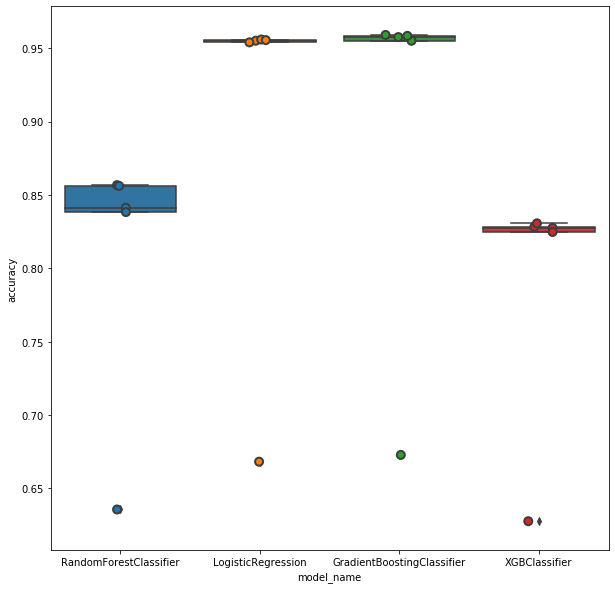

In [77]:
# !pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LogisticRegression(random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42),
    XGBClassifier(random_state=42,learning_rate=0.01)
    
]

cv_df = pd.DataFrame(index=range(5 * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tf, y, scoring='accuracy', cv=5)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='model_name', y='accuracy', data=cv_df,ax=ax)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,ax=ax, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [72]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.897713
RandomForestClassifier    0.805611
XGBClassifier             0.787783
Name: accuracy, dtype: float64

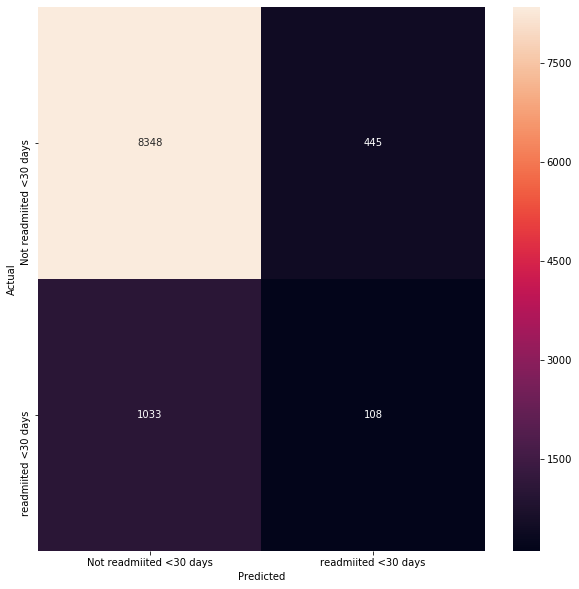

In [75]:
model =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Not readmiited <30 days', 'readmiited <30 days'], yticklabels=['Not readmiited <30 days', 'readmiited <30 days'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [76]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      8793
           1       0.20      0.09      0.13      1141

    accuracy                           0.85      9934
   macro avg       0.54      0.52      0.52      9934
weighted avg       0.81      0.85      0.83      9934

